# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Selly Rizkiyah]
- **Email:** [sellyrizkiyah01@gmail.com]
- **ID Dicoding:** [selly_rk]

## Menentukan Pertanyaan Bisnis

- Di musim apa jumlah sepeda paling banyak dan paling sedikit disewakan?
- Di tahun berapa jumlah sepeda paling banyak dan paling sedikit disewakan?
- Bagaimana tren jumlah sewa sepeda di tahun 2011?
- Bagaimana tren jumlah sewa sepeda di tahun 2012?
- Berapa perbandingan penyewaan sepeda digunakan saat hari kerja dan saat hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memanggil dataset

In [2]:
day_df = pd.read_csv("/content/day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

Mencari info dari dataset (jumlah, tipe, dan na)

Melakukan accesing data ke day-df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Melakukan accesing data ke hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

### cleaning data day df

Mengubah tipe data dari kolom 'dteday' dari tipe object ke datetime, krn ini menunjukkan katerangan waktu (yyyy-mm-dd)

In [12]:
dateday_columns = ["dteday"]

for column in dateday_columns:
  day_df[column] = pd.to_datetime(day_df[column])

Mengganti kode di kolom "season"

In [13]:
day_df['season'] = day_df['season'].replace({
    1: 'springer',
    2: 'summer',
    3: 'fall',
    4: 'winter',})

mengganti kode di kolom "weathersit"

In [14]:
day_df['weathersit'] = day_df['weathersit'].replace({
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog',})

mengganti kode di kolom "workingday"

In [15]:
day_df['workingday'] = day_df['workingday'].replace({
    1: 'workingday',
    0: 'holiday',})

mengganti kode di kolom "yr"

In [16]:
day_df['yr'] = day_df['yr'].replace({
    1: '2012',
    0: '2011',})

In [17]:
day_df.info() #mengecek apakah datetime sudah teraplikasikan dan tipe data yang sudah diubah kodenya tadi berubah

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [18]:
day_df.head()  #melihat hasil

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,0,6,holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,0,0,holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,0,1,workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,0,2,workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,0,3,workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### cleaning data hour_df

Mengubah tipe data dari kolom 'dteday' dari tipe object ke datetime, krn ini menunjukkan katerangan waktu (yyyy-mm-dd)

In [20]:
dateday_columns = ["dteday"]

for column in dateday_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

Mengganti kode musim dan kode cuaca

In [21]:
hour_df['season'] = hour_df['season'].replace({
    1: 'springer',
    2: 'summer',
    3: 'fall',
    4: 'winter',})

In [22]:
hour_df['weathersit'] = hour_df['weathersit'].replace({
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog',})

In [23]:
hour_df['workingday'] = hour_df['workingday'].replace({
    1: 'workingday',
    0: 'holiday',})

In [24]:
hour_df['yr'] = hour_df['yr'].replace({
    1: '2012',
    0: '2011',})

In [25]:
hour_df.info() #mengecek apakah datetime sudah teraplikasikan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  object        
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [26]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,0,0,6,holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,springer,2011,1,1,0,6,holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,springer,2011,1,2,0,6,holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,springer,2011,1,3,0,6,holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,springer,2011,1,4,0,6,holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
dateday_columns = ["dteday"]

for column in dateday_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
hour_df.info() #mengecek apakah datetime sudah teraplikasikan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore day_df

In [27]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731.000000,731.000000,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,2012,NaN,NaN,NaN,workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,NaN,NaN,NaN,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,6.519836,0.028728,2.997264,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,1.000000,0.000000,0.000000,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,4.000000,0.000000,1.000000,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,7.000000,0.000000,3.000000,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,10.000000,0.000000,5.000000,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,12.000000,1.000000,6.000000,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- Dilihat dari statistik deskriptif di atas, rata-rata penyewaan sepeda berkisar di di antara bulan Juni-Juli (6.5). Informasi ini menunjukkan jika user lebih suka menyewa sepeda di bulan-bulan saat musim panas tiba. Selain itu, dapat dilihat rata-rata penyewa sepeda sebanyak 4504 orang dalam sehari

#### Mengelompokkan berdasarkan musim

In [37]:
day_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
fall        1061129
summer       918589
winter       841613
springer     471348
Name: cnt, dtype: int64

- Ternyata, setelah dilihat jumlah persebarannya, penyewaan sepeda paling banyak terjadi di musim gugur, musim panas berada di urutan kedua, dan paling sedikit saat di musim dingin

#### Mengelompokkan berdasarkan tahun

In [38]:
day_df.groupby(by="yr").cnt.sum().sort_values(ascending=False)

yr
2012    2049576
2011    1243103
Name: cnt, dtype: int64

- Setelah dilihat, penghasilan dari penyewaan sepeda lebih banyak di tahun 2012 daripada di tahun 2011

#### Mengelompokkan berdasarkan workingday dan holiday

In [39]:
day_df.groupby(by="workingday").cnt.sum().sort_values(ascending=False)

workingday
workingday    2292410
holiday       1000269
Name: cnt, dtype: int64

- setelah dilihat, jumlah penyewaan speeda lebih banyak dilakukan saat hari kerja atau hari biasa, dibanding dengan saat hari libur atau akhir pekan

#### Melihat user penyewa paling banyak

In [33]:
day_df.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,fall,2012,9,0,6,holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,winter,2012,9,0,6,holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,fall,2012,9,0,6,holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,summer,2012,3,0,5,workingday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,summer,2012,5,0,6,holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-03-06,springer,2011,3,0,0,holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,springer,2011,1,0,3,workingday,"Light Snow, Light Rain + Thunderstorm + Scatte...",0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,springer,2012,12,0,3,workingday,"Light Snow, Light Rain + Thunderstorm + Scatte...",0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,springer,2011,1,0,4,workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.195000,0.219700,0.687500,0.113837,15,416,431


### Explore hour_df

In [42]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,NaN,NaN,NaN,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,2012,NaN,NaN,NaN,NaN,workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,NaN,NaN,NaN,NaN,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,6.537775,11.546752,0.028770,3.003683,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,4.000000,6.000000,0.000000,1.000000,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,7.000000,12.000000,0.000000,3.000000,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,10.000000,18.000000,0.000000,5.000000,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,12.000000,23.000000,1.000000,6.000000,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- Dilihat dari statistik deskriptif di atas, rata-rata penyewaan sepeda berkisar di di antara bulan Juni-Juli (6.5). Informasi ini menunjukkan jika user lebih suka menyewa sepeda di bulan-bulan saat musim panas tiba. Selain itu, dapat dilihat rata-rata penyewa sepeda ada sebanyak 189 orang per jamnya

#### Mengelompokkan berdasarkan musim

In [43]:
hour_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
fall        1061129
summer       918589
winter       841613
springer     471348
Name: cnt, dtype: int64

- Ternyata, setelah dilihat jumlah persebarannya, penyewaan sepeda paling banyak terjadi di musim gugur, musim panas berada di urutan kedua, dan paling sedikit saat di musim dingin

#### Mengelompokkan berdasarkan tahun

In [45]:
hour_df.groupby(by="yr").cnt.sum().sort_values(ascending=False)

yr
2012    2049576
2011    1243103
Name: cnt, dtype: int64

- Setelah dilihat, penghasilan dari penyewaan sepeda lebih banyak di tahun 2012 daripada di tahun 2011

#### Mengelompokkan berdasarkan workingday dan holiday

In [46]:
hour_df.groupby(by="workingday").cnt.sum().sort_values(ascending=False)

workingday
workingday    2292410
holiday       1000269
Name: cnt, dtype: int64

- setelah dilihat, jumlah penyewaan speeda lebih banyak dilakukan saat hari kerja atau hari biasa, dibanding dengan saat hari libur atau akhir pekan

#### Melihat user penyewa paling banyak

In [ ]:
hour_df.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,fall,2012,9,0,6,holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,winter,2012,9,0,6,holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,fall,2012,9,0,6,holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,summer,2012,3,0,5,workingday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,summer,2012,5,0,6,holiday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.600000,0.566908,0.456250,0.083975,3410,4884,8294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,2011-03-06,springer,2011,3,0,0,holiday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.376522,0.366252,0.948261,0.343287,114,491,605
25,26,2011-01-26,springer,2011,1,0,3,workingday,"Light Snow, Light Rain + Thunderstorm + Scatte...",0.217500,0.203600,0.862500,0.293850,34,472,506
725,726,2012-12-26,springer,2012,12,0,3,workingday,"Light Snow, Light Rain + Thunderstorm + Scatte...",0.243333,0.220333,0.823333,0.316546,9,432,441
26,27,2011-01-27,springer,2011,1,0,4,workingday,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.195000,0.219700,0.687500,0.113837,15,416,431


#### Karena day_df dan hour_df memiliki data keseluruhan dan hasil eksplorasi yang sebagian besar sama, maka dari itu, dalam tahap-tahap selanjutnya, hanya menggunakan day_df

## Visualization & Explanatory Analysis

### Di musim apa jumlah sewa sepeda paling banyak dan paling sedikit disewakan?

In [48]:
season_day_df = day_df.groupby("season").cnt.sum().sort_values(ascending=False).reset_index()
season_day_df

,season,cnt
0,fall,1061129
1,summer,918589
2,winter,841613
3,springer,471348


<ipython-input-51-901cd900bfc0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-51-901cd900bfc0>:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


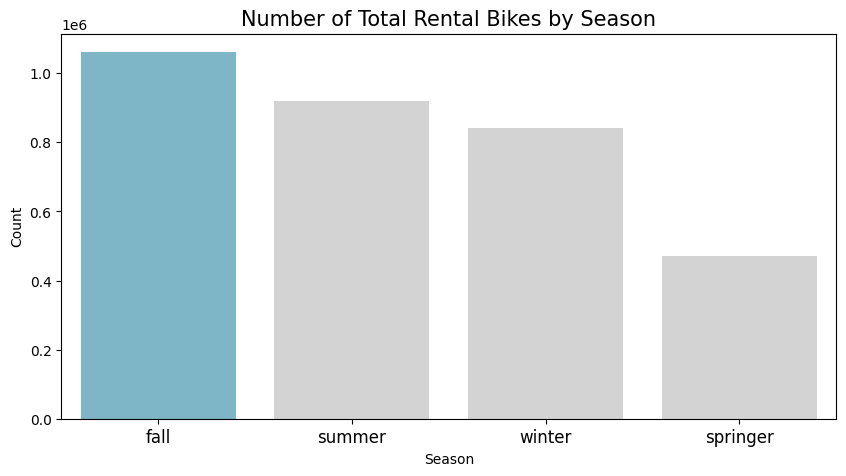

In [51]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="cnt",
    x="season",
    data=season_day_df.sort_values(by="cnt", ascending=False),
    palette=colors
)
plt.title("Number of Total Rental Bikes by Season", loc="center", fontsize=15)
plt.ylabel("Count")
plt.xlabel("Season")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Di tahun berapa jumlah sewa sepeda paling banyak dan paling sedikit disewakan?


In [52]:
yr_day_df = day_df.groupby("yr").cnt.sum().sort_values(ascending=False).reset_index()
yr_day_df

,yr,cnt
0,2012,2049576
1,2011,1243103


<ipython-input-54-92b82ae61cdd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-54-92b82ae61cdd>:3: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(


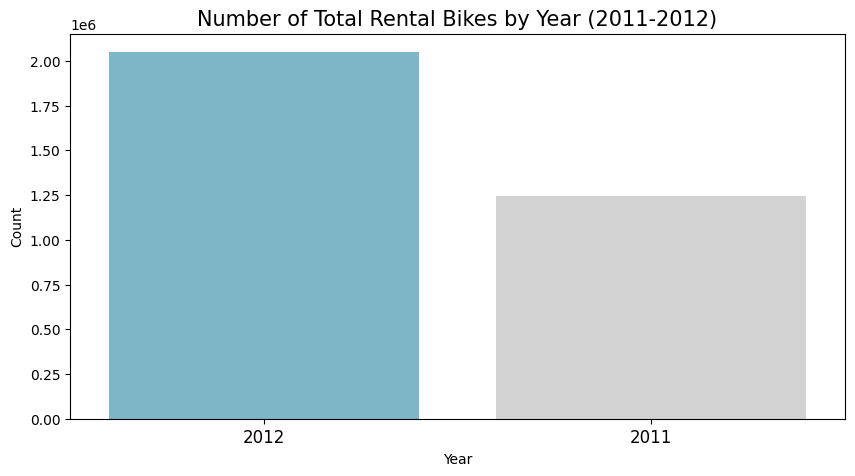

In [54]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    y="cnt",
    x="yr",
    data=yr_day_df.sort_values(by="cnt", ascending=False),
    palette=colors
)
plt.title("Number of Total Rental Bikes by Year (2011-2012)", loc="center", fontsize=15)
plt.ylabel("Count")
plt.xlabel("Year")
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Bagaimana tren jumlah sewa sepeda dari tahun 2011 dan 2012?


In [68]:
monthly_rental_2011 = day_df[day_df['dteday'].dt.year == 2011].resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})
monthly_rental_2011.index = monthly_rental_2011.index.strftime('%Y-%m')
monthly_rental_2011 = monthly_rental_2011.reset_index()
monthly_rental_2011.rename(columns={
    "instant": "record",
    "cnt": "count"
}, inplace=True)
monthly_rental_2011

,dteday,record,count
0,2011-01,31,38189
1,2011-02,28,48215
2,2011-03,31,64045
3,2011-04,30,94870
4,2011-05,31,135821
5,2011-06,30,143512
6,2011-07,31,141341
7,2011-08,31,136691
8,2011-09,30,127418
9,2011-10,31,123511


In [61]:
monthly_rental_2012 = day_df[day_df['dteday'].dt.year == 2012].resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})
monthly_rental_2012.index = monthly_rental_2012.index.strftime('%Y-%m')
monthly_rental_2012 = monthly_rental_2012.reset_index()
monthly_rental_2012.rename(columns={
    "instant": "record",
    "cnt": "count"
}, inplace=True)
monthly_rental_2012

,dteday,record,count
0,2012-01,31,96744
1,2012-02,29,103137
2,2012-03,31,164875
3,2012-04,30,174224
4,2012-05,31,195865
5,2012-06,30,202830
6,2012-07,31,203607
7,2012-08,31,214503
8,2012-09,30,218573
9,2012-10,31,198841


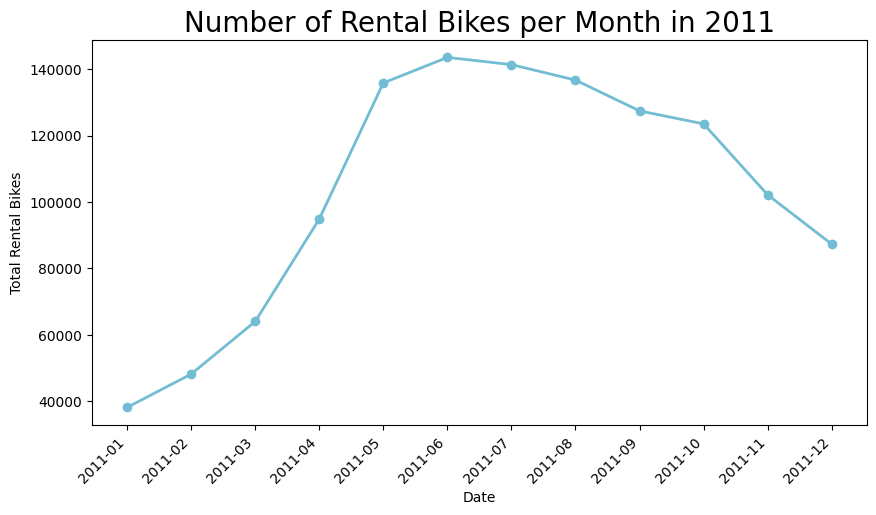

In [69]:
monthly_rental_2011 = day_df[day_df['dteday'].dt.year == 2011].resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})
monthly_rental_2011.index = monthly_rental_2011.index.strftime('%Y-%m')
monthly_rental_2011 = monthly_rental_2011.reset_index()
monthly_rental_2011.rename(columns={
    "instant": "record",
    "cnt": "count"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_rental_2011["dteday"], monthly_rental_2011["count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Rental Bikes per Month in 2011", loc="center", fontsize=20)
plt.xlabel("Date")
plt.ylabel("Total Rental Bikes")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

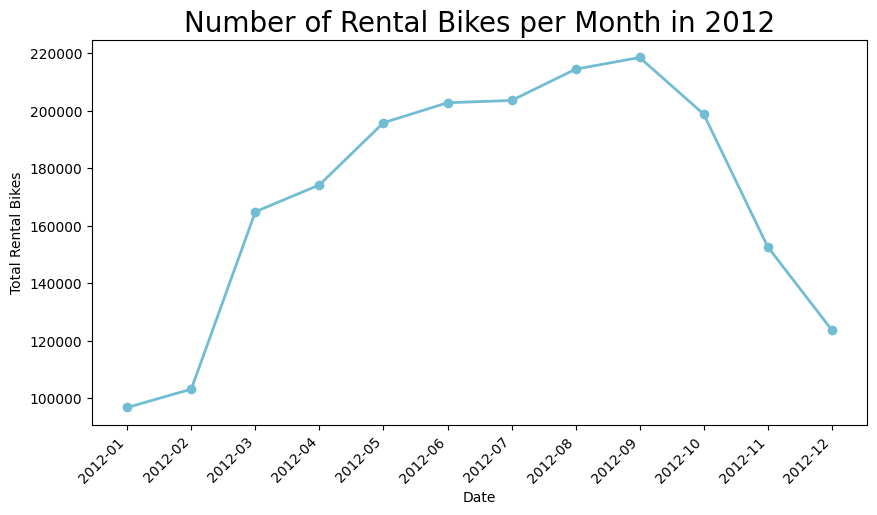

In [70]:
monthly_rental_2012 = day_df[day_df['dteday'].dt.year == 2012].resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "cnt": "sum"
})
monthly_rental_2012.index = monthly_rental_2012.index.strftime('%Y-%m')
monthly_rental_2012 = monthly_rental_2012.reset_index()
monthly_rental_2012.rename(columns={
    "instant": "record",
    "cnt": "count"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_rental_2012["dteday"], monthly_rental_2012["count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Rental Bikes per Month in 2012", loc="center", fontsize=20)
plt.xlabel("Date")
plt.ylabel("Total Rental Bikes")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Berapa perbandingan penyewaan sepeda digunakan saat hari kerja dan saat hari libur?


In [72]:
work_day_df = day_df.groupby("workingday").cnt.sum().sort_values(ascending=False).reset_index()
work_day_df

,workingday,cnt
0,workingday,2292410
1,holiday,1000269


In [81]:
day_df['workingday'] = day_df['workingday'].astype(str)

In [85]:
day_df['cnt'] = day_df['cnt'].astype(float)

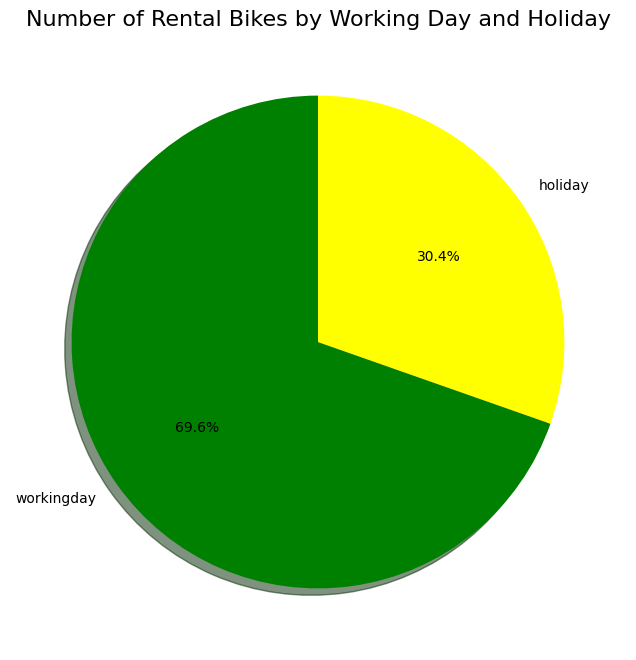

In [89]:
work_day_df = pd.DataFrame({
    'workingday': ['workingday', 'holiday'],
    'cnt': [2292410, 1000269]
})

workingday = work_day_df['workingday']
cnt = work_day_df['cnt']

colors = ['green', 'yellow']

plt.figure(figsize=(8, 8))
plt.pie(cnt, labels=workingday, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Number of Rental Bikes by Working Day and Holiday", fontsize=16)
plt.show()

### Melakukan rfm

In [100]:
rfm_df = day_df.groupby(by="instant", as_index=False).agg({
    "dteday": "max",  # mengambil tanggal sewa terakhir
    "registered": "sum",  # menghitung total dari jumlah penyewa yang sudah registrasi
    "cnt": "sum"  # menghitung jumlah total sewa
})
rfm_df.columns = ["records", "max_order_timestamp", "frequency", "monetary"]

# Menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"]).dt.date
recent_date = pd.to_datetime(day_df["dteday"]).dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

rfm_df.head()

,records,frequency,monetary,recency
0,1,654,985.0,730
1,2,670,801.0,729
2,3,1229,1349.0,728
3,4,1454,1562.0,727
4,5,1518,1600.0,726


<ipython-input-102-1d417c0d1a47>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="records", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-102-1d417c0d1a47>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="records", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-102-1d417c0d1a47>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="records", data=rfm_df.sort_values(by="monetary"

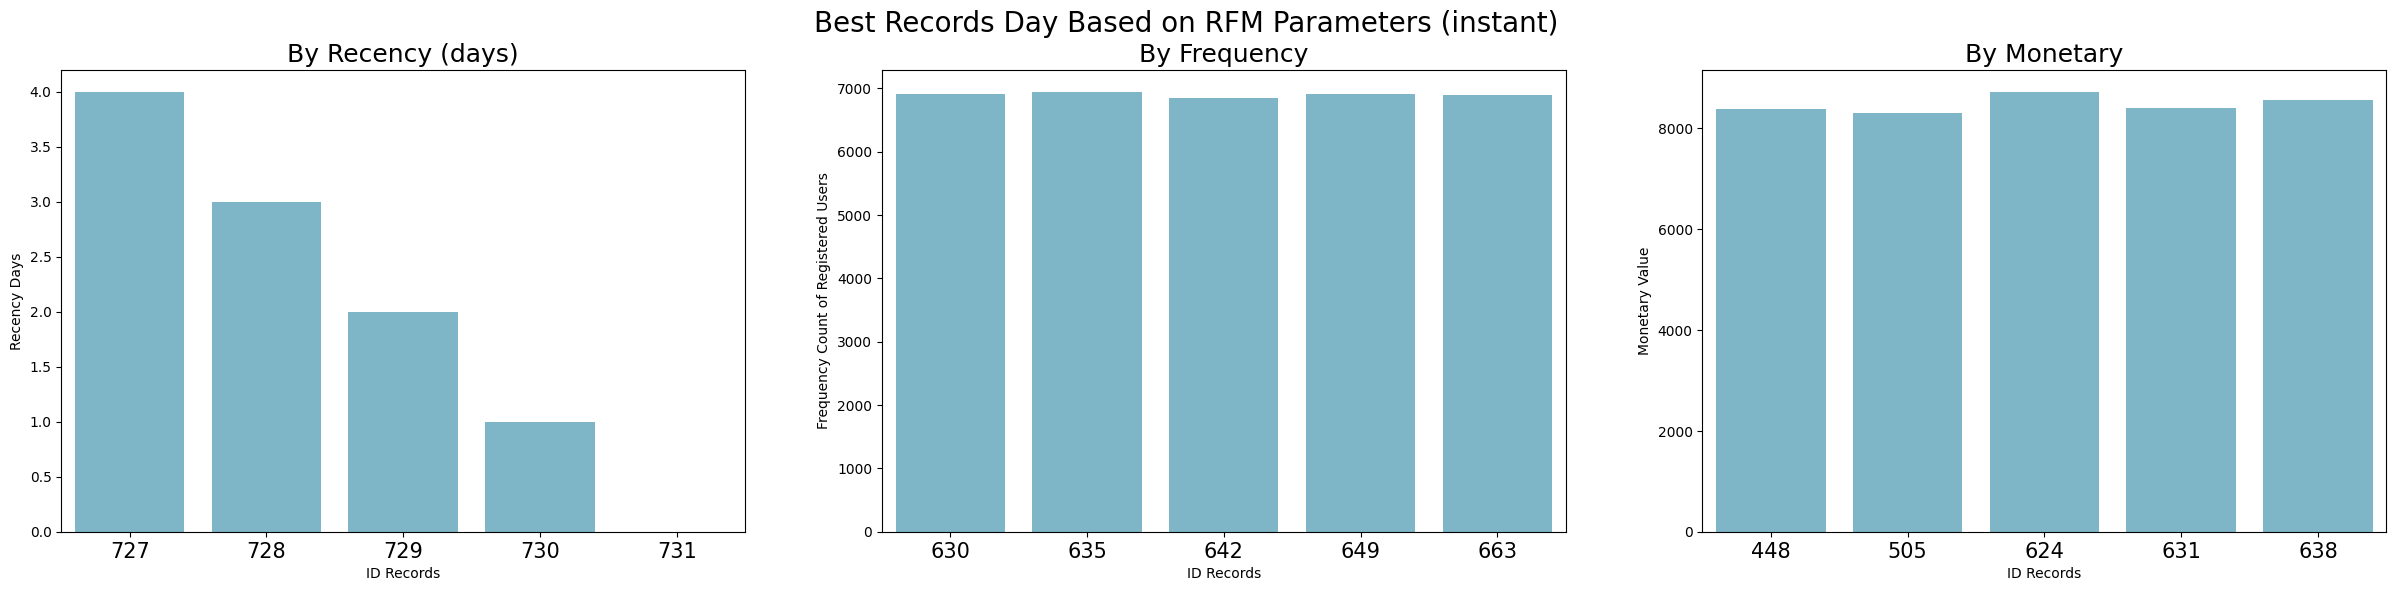

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# Recency plot
sns.barplot(y="recency", x="records", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel("Recency Days")
ax[0].set_xlabel("ID Records")
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Frequency plot
sns.barplot(y="frequency", x="records", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel("Frequency Count of Registered Users")
ax[1].set_xlabel("ID Records")
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Monetary plot
sns.barplot(y="monetary", x="records", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel("Monetary Value")
ax[2].set_xlabel("ID Records")
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Records Day Based on RFM Parameters (instant)", fontsize=20)
plt.show()

## Conclusion

- Conclution "Di musim apa jumlah sepeda paling banyak dan paling sedikit disewakan?" yaitu, di musim gugur (fall) jumlah penyewaan sepeda paling banyak, hal ini mungkin disebabkan karena di musim ini cuacanya tidak terlalu panas juga tidak terlalu dingin, jadi kemungkinan musim ini adalah waktu yang pas untuk bersepeda. Sedangkan musim dingin menjadi musim yang paling sedikit angka jumlah penyewaan, hal ini disebabkan karena cuaca yang dingin dan jalanan yang licin.
- Conclution "Di tahun berapa jumlah sepeda paling banyak dan paling sedikit disewakan?" yaitu, pada tahun 2012 angka penyewaan sepeda lebih banyak dari tahun 2011. Hal ini dapat disebabkan oleh beebrapa faktor.
- Conclution "Bagaimana tren jumlah sewa sepeda di tahun 2011?", tren tahun 2011 menunjukkan jika terjadi peningkatan jumlah penyewaan sepeda paling tinggi di bulan Juni dan terendah di bulan Januari, perbedaan ini kemungkinan disebabkan oleh faktor-faktor seperti musim dan cuaca.
- Conclution "Bagaimana tren jumlah sewa sepeda di tahun 2012?", tren tahun 2012 menunjukkan jika terjadi peningkatan jumlah penyewaan sepeda paling tinggi di bulan September dan terendah di bulan Januari, perbedaan ini kemungkinan disebabkan oleh faktor-faktor seperti musim dan cuaca.
- Conclution "Berapa presentase penyewaan sepeda digunakan saat hari kerja dan saat hari libur?", presentase penyewaan sepeda pada hari biasa sebanyak 69.6%, hal ini dapat disebabkan sepeda digunakan sebagai transportasi sehari-hari (bekerja, sekolah, dll), sementara itu, prsentase penyewaan sepeda pada hari libur atau akhir pekan sebanyak 30.4%, terdapat perbedaan yang signifikan, hal ini karena memang jumlah hari libur lebih sedikit dari jumlah hari biasa

In [1]:
import subprocess

installed_packages = subprocess.check_output(["pip", "freeze"]).decode("utf-8").split('\n')

desired_packages = {
    "babel",
    "requests",
    "numpy",
    "pandas",
    "streamlit",
    "matplotlib",
    "seaborn"
}

filtered_packages = [pkg for pkg in installed_packages if pkg.split('==')[0] in desired_packages]

with open('requirements.txt', 'w') as f:
    for pkg in filtered_packages:
        f.write(pkg + '\n')